# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import warnings

[nltk_data] Downloading package wordnet to /Users/Zapi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/Zapi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Load data

In [2]:
import openpyxl  # Ensure openpyxl is installed for Excel reading
import os

# Set the path to the local data file
data_path = 'data/cleaned_corpus_current.xlsx'

# Check if file exists
if not os.path.exists(data_path):
    print(f"Warning: File not found at {data_path}")
    print("Please ensure the file exists at the specified path")
else:
    print(f"Loading data from: {data_path}")

Loading data from: data/cleaned_corpus_current.xlsx


In [3]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
# Load data from local Excel file
corpus = pd.read_excel(data_path)

# Convert date_published as datetime data type
corpus['date_published'] = pd.to_datetime(
  corpus['date_published']
)

## Inspecting the data

In [5]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            2138 non-null   object        
 1   link             2150 non-null   object        
 2   date_published   2150 non-null   datetime64[ns]
 3   text             2138 non-null   object        
 4   like_count       2138 non-null   float64       
 5   reply_parent_id  415 non-null    object        
 6   source           2150 non-null   object        
 7   cleaned_text     2090 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 134.5+ KB


In [6]:
display(
  corpus.head()
)
display(
  corpus.tail()
)

,title,link,date_published,text,like_count,reply_parent_id,source,cleaned_text
0,NaN,https://www.rappler.com/philippines/dpwh-manue...,2025-08-31 17:02:21,NaN,NaN,NaN,rappler,NaN
1,NaN,https://www.rappler.com/philippines/dpwh-suspe...,2025-09-03 11:20:56,NaN,NaN,NaN,rappler,NaN
2,NaN,https://www.rappler.com/philippines/flood-cont...,2025-09-04 15:01:13,NaN,NaN,NaN,rappler,NaN
3,NaN,https://www.rappler.com/philippines/coa-holds-...,2025-09-09 10:47:37,NaN,NaN,NaN,rappler,NaN
4,NaN,https://www.rappler.com/philippines/visayas/ma...,2025-08-14 15:36:45,NaN,NaN,NaN,rappler,NaN


,title,link,date_published,text,like_count,reply_parent_id,source,cleaned_text
2145,Do u really have to investigate since it&#39;s...,https://www.youtube.com/watch?v=SpYDbT-PHeA&lc...,2025-11-14 22:08:07,Do u really have to investigate since it's cle...,0.0,NaN,youtube,u really investigate since clear ghost project...
2146,They are govt officials that needs appearance ...,https://www.youtube.com/watch?v=SpYDbT-PHeA&lc...,2025-11-14 22:06:20,They are govt officials that needs appearance ...,0.0,NaN,youtube,govt officials needs appearance investigtion
2147,Lagot kayong mga kurakot Kay sir sen general l...,https://www.youtube.com/watch?v=SpYDbT-PHeA&lc...,2025-11-14 20:56:23,Lagot kayong mga kurakot Kay sir sen general l...,1.0,NaN,youtube,lagot kayong kurakot sir sen general lacson
2148,Dapat kasuhan na Sila nagaalburuto na Ang mamayan,https://www.youtube.com/watch?v=SpYDbT-PHeA&lc...,2025-11-14 20:49:15,Dapat kasuhan na Sila nagaalburuto na Ang mamayan,3.0,NaN,youtube,kasuhan nagaalburuto mamayan
2149,US News on Philippine affairs? AYOS AH,https://www.youtube.com/watch?v=SpYDbT-PHeA&lc...,2025-11-14 18:28:50,US News on Philippine affairs? AYOS AH,1.0,NaN,youtube,us news philippine affairs ayos ah


# Topic Modeling

In [7]:
!pip install pyLDAvis

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis

  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached numexpr-2.14.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)
Using cached numexpr-2.14.1-cp313-cp313-macosx_11_0_arm64.whl (152 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pyLDAvis]2/3 [pyLDAvis]


## Document-Term Matrix

In [8]:
# ERROR: ValueError: np.nan is an invalid document, expected byte or unicode string.
corpus['cleaned_text'] = corpus['cleaned_text'].fillna('')

In [9]:
vectorizer = CountVectorizer(
  max_df=0.95,  # terms that appears 95% within the corpus
  min_df=2,  # terms that appear at 2x within the corpus
  stop_words='english'  # ignore english stopwords
)
doc_term_matrix = vectorizer.fit_transform(
  corpus['cleaned_text']
)

doc_term_matrix.toarray().shape
# (851, 2065) --> 851 documents and 2065 unique words

(2150, 2609)

In [10]:
pd.DataFrame(
  doc_term_matrix.toarray()
)

,0,1,2,3,4,5,6,7,8,9,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## LDA

In [11]:
LDA = LatentDirichletAllocation(
  n_components=3,  # no. of topics
  random_state=42  # random seed for replicability
)
LDA.fit(doc_term_matrix)

,n_components,3
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [12]:
len(LDA.components_)

3

## Topic-Term Matrix

In [13]:
topic_term_matrix = LDA.components_
pd.DataFrame(topic_term_matrix)

,0,1,2,3,4,5,6,7,8,9,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608
0,0.351196,2.333004,1.330098,5.334623,2.290640,0.333543,1.032256,0.343630,0.360871,0.333734,...,0.356101,0.348534,33.171568,2.313983,7.064413,1.342832,2.340628,0.333907,0.334393,0.333721
1,0.333547,0.333503,0.334776,0.333713,0.375417,3.331371,2.604529,0.354995,0.333836,0.358678,...,0.335098,1.522357,5.677374,0.352502,28.811445,1.323219,1.307423,2.315987,2.325776,0.443301
2,2.315257,0.333494,1.335126,1.331665,0.333942,0.335086,0.363216,2.301375,3.305294,3.307588,...,2.308801,2.129109,5.151059,0.333515,34.124141,0.333949,1.351949,2.350106,0.339831,3.222978


In [14]:
topic1 = topic_term_matrix[0]
topic1

# sort the scores from lowest to highest
# will return all terms
topic1.argsort()

# select top 10 terms within topic1
topic1_term_index = topic1.argsort()[-10:]

# convert back to words/terms
[vectorizer.get_feature_names_out()[index] for index in topic1_term_index]

['nag',
 'pera',
 'niyo',
 'control',
 'projects',
 'flood',
 'ghost',
 'project',
 'ilocos',
 'davao']

In [15]:
for topic_number, topic in enumerate(LDA.components_):
  print(f'The top 10 words for topic #{topic_number}')
  print(
    [
      vectorizer.get_feature_names_out()[term_index] for term_index in topic.argsort()[-5:]
    ]
  )
  print("\n")

The top 10 words for topic #0
['flood', 'ghost', 'project', 'ilocos', 'davao']


The top 10 words for topic #1
['law', 'magnanakaw', 'marcos', 'corruption', 'corrupt']


The top 10 words for topic #2
['control', 'flood', 'taong', 'dpwh', 'bayan']




## Document-Topic Matrix

In [16]:
doc_topic_matrix = LDA.transform(doc_term_matrix)
pd.DataFrame(doc_topic_matrix)

,0,1,2
0,0.333333,0.333333,0.333333
1,0.333333,0.333333,0.333333
2,0.333333,0.333333,0.333333
3,0.333333,0.333333,0.333333
4,0.333333,0.333333,0.333333
...,...,...,...
2145,0.914561,0.042229,0.043210
2146,0.067951,0.862384,0.069665
2147,0.910869,0.046194,0.042937
2148,0.114655,0.772195,0.113150


In [17]:
corpus['Topic'] = doc_topic_matrix.argmax(axis=1)
display(
  corpus[['cleaned_text', 'source', 'Topic']]
)
corpus[['cleaned_text', 'source', 'Topic']].to_excel('topic_documents.xlsx')

,cleaned_text,source,Topic
0,,rappler,0
1,,rappler,0
2,,rappler,0
3,,rappler,0
4,,rappler,0
...,...,...,...
2145,u really investigate since clear ghost project...,youtube,0
2146,govt officials needs appearance investigtion,youtube,1
2147,lagot kayong kurakot sir sen general lacson,youtube,0
2148,kasuhan nagaalburuto mamayan,youtube,1


In [18]:
display(
  corpus.query("Topic == 2 and source == 'rappler'")['text']
)

display(
  corpus.query("Topic == 1 and source == 'youtube'")['text']
)

Series([], Name: text, dtype: object)

12                                   iyak mga ddshit iyak
15                                       iyak ddshit iyak
17                                       iyak ddshit iyak
19                                       iyak ddshit iyak
21                                       iyak ddshit iyak
                              ...                        
2133    Mag tatanngol na Naman Kay ZALDY CO ..may DISC...
2136    due process TOO LONG. Before you know it they ...
2144    Prosecutor Atty General Richard is very articu...
2146    They are govt officials that needs appearance ...
2148    Dapat kasuhan na Sila nagaalburuto na Ang mamayan
Name: text, Length: 577, dtype: object

## Visualize using PyLDAViz

In [19]:
vocab = vectorizer.get_feature_names_out()
doc_lengths = [
  len(doc) for doc in corpus['cleaned_text']
]
term_freq = doc_term_matrix.sum(axis=0)
term_freqs = np.array(term_freq).flatten()
vis_data = pyLDAvis.prepare(topic_term_matrix, doc_topic_matrix, doc_lengths, vocab, term_freqs)

pyLDAvis.display(vis_data)

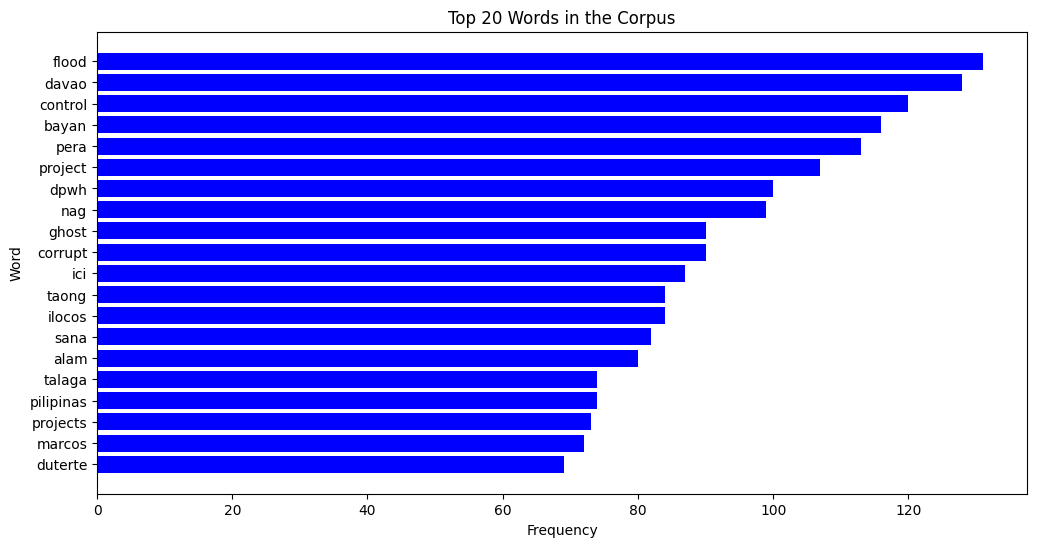

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get vocabulary and term frequencies
vocab = vectorizer.get_feature_names_out()
term_freq = np.array(doc_term_matrix.sum(axis=0)).flatten()

# Create dataframe of words and frequencies
word_freq_df = pd.DataFrame({
    'word': vocab,
    'frequency': term_freq
})

# Sort and select top 20
top_words = word_freq_df.sort_values(by='frequency', ascending=False).head(20)

# Plot bar graph
plt.figure(figsize=(12,6))
plt.barh(top_words['word'][::-1], top_words['frequency'][::-1], color="blue")  # horizontal bar chart
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Top 20 Words in the Corpus")
plt.show()

In [21]:
corpus.to_excel('./data/corpus_with_topics.xlsx', index=False)